In [3]:
# created by zayaan. going to test using a basic neural network for the stuff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#we want to create a neural network, so we need to import the keras library
from keras.models import Sequential
import tensorflow as tf
from sklearn.ensemble import IsolationForest

In [4]:
csv_file = "500k.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
u = df['u']
g = df['g']
r = df['r']
i = df['i']
z = df['z']

# color indices
u_g = u - g
g_r = g - r
r_i = r - i
i_z = i - z

# u_g = u_g[:-19500]
# g_r = g_r[:-19500]
# r_i = r_i[:-19500]
# i_z = i_z[:-19500]

# Effective temperature of star
temperature = df['Teff']

metallicity = df['FeH']

color_filters_df = pd.DataFrame()
color_filters_df['u_g'] = u_g
color_filters_df['g_r'] = g_r
color_filters_df['r_i'] = r_i
color_filters_df['i_z'] = i_z

# Effective temperature of star
color_filters_df['temperature'] = df['Teff']
color_filters_df['metallicity'] = df['FeH']
print(df.shape)

(500000, 7)


In [5]:
df = df[~(df == -9999).any(axis=1)]

In [6]:
print(df.shape)

(499984, 7)


In [7]:
#iterate thru temperature,
#if its 4353, print out the corresponding color filters
# for i in range(len(temperature)):
#     if color_filters_df.iloc[i]['u_g'] > 10:
#         #print temperature
#         print("Temp: ", color_filters_df.iloc[i][''])
#         print("u_g: ", color_filters_df.iloc[i]['u_g'])


In [8]:
# # remove outliers by removing all data points that are outside 25th percentile - 75th percentile range
# dropped_rows = set()

# # TEMPERATURE OUTLIERS    
# Q1_temp = color_filters_df['temperature'].quantile(0.25)
# Q3_temp = color_filters_df['temperature'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['temperature']>=upper)[0]
# lower_array = np.where(color_filters_df['temperature']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)

# # U_G OUTLIERS
# Q1_temp = color_filters_df['u_g'].quantile(0.25)
# Q3_temp = color_filters_df['u_g'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['u_g']>=upper)[0]
# lower_array = np.where(color_filters_df['u_g']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)
    
# # G_R OUTLIERS
# Q1_temp = color_filters_df['g_r'].quantile(0.25)
# Q3_temp = color_filters_df['g_r'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['g_r']>=upper)[0]
# lower_array = np.where(color_filters_df['g_r']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)
    
# # R_I OUTLIERS
# Q1_temp = color_filters_df['r_i'].quantile(0.25)
# Q3_temp = color_filters_df['r_i'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['r_i']>=upper)[0]
# lower_array = np.where(color_filters_df['r_i']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element) 

# # I_Z OUTLIERS
# Q1_temp = color_filters_df['i_z'].quantile(0.25)
# Q3_temp = color_filters_df['i_z'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['i_z']>=upper)[0]
# lower_array = np.where(color_filters_df['i_z']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element) 

# color_filters_df.drop(dropped_rows, inplace=True)
# print(color_filters_df.sort_values(by=['temperature'], ascending=False))

In [9]:
# Model Training for Isolation Trees 
# isoforest = IsolationForest(n_estimators=150,max_samples="auto", contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["temperature"]])

# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["temperature"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["temperature"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]

#now do it u_g, g_r, r_i, i_z, metallicity
#isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest.fit(color_filters_df[["metallicity"]])
# Prediction
color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["metallicity"]])
color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["metallicity"]])
color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]

In [10]:
print(color_filters_df.shape)

(455537, 8)


In [11]:
#the input of the model is the color indices, and the output is the temperature.
#lets perform this with a neural network
#we need to split the data into training and testing data
#we will use 80% of the data for training and 20% for testing
#we will also shuffle the data to avoid any bias

X = color_filters_df[['u_g', 'g_r', 'r_i', 'i_z','metallicity']].values
# X = color_filters_df[['g_r', 'r_i']].values
y = color_filters_df['temperature'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [12]:
#plot the each X vs y
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 4, 1)
# plt.scatter(X_train[:, 0], y_train, s=1, label='train')
# plt.scatter(X_test[:, 0], y_test, s=1, label='test')
# plt.xlabel('u_g')
# plt.ylabel('temperature')
# plt.legend()
print(y.shape)

(455537,)


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)), #change input shape based on how many u using
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  #1 neuron output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [14]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
9111/9111 [==============================] - 5s 537us/step - loss: 1686557952.0000 - mae: 899.5202 - val_loss: 17442112.0000 - val_mae: 650.6290
Epoch 2/20
9111/9111 [==============================] - 5s 541us/step - loss: 70294880.0000 - mae: 958.9343 - val_loss: 6637702.5000 - val_mae: 980.2139
Epoch 3/20
9111/9111 [==============================] - 5s 540us/step - loss: 2540350.7500 - mae: 677.1467 - val_loss: 817483.4375 - val_mae: 550.3912
Epoch 4/20
9111/9111 [==============================] - 5s 541us/step - loss: 931436.6875 - mae: 496.5805 - val_loss: 1152984.1250 - val_mae: 470.7048
Epoch 5/20
9111/9111 [==============================] - 5s 546us/step - loss: 2238874.0000 - mae: 443.8273 - val_loss: 595482.8750 - val_mae: 426.2126
Epoch 6/20
9111/9111 [==============================] - 5s 549us/step - loss: 619209.1250 - mae: 421.1806 - val_loss: 623217.2500 - val_mae: 394.6401
Epoch 7/20
9111/9111 [==============================] - 5s 555us/step - loss: 577286.750

In [15]:
#print accuracy of model
print(model.evaluate(X_test, y_test))

2848/2848 [==============================] - 1s 267us/step - loss: 301800.1250 - mae: 347.3646
[301800.125, 347.3646240234375]


In [16]:
predictions = model.predict(X_test)

#assign max to a really low number
max = -10000000
#assign min to a really high number
min = 10000000

avg = 0

for i in range(len(X_test)):
    # print("Input:", X_test[i])
    #if actual output is greater than 250000, then pritn it
    if predictions[i][0] > 250000: # HAD y_test[i] == 4353
        print("Input:", X_train[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i][0])  # predictions[i] is a 2D array, so we access the value with [0]
        print()
    #update max and min accordingly, based on difference in expected and actual output
    if abs(y_test[i] - predictions[i][0]) > max:
        max = abs(y_test[i] - predictions[i][0])
    if abs(y_test[i] - predictions[i][0]) < min:
        min = abs(y_test[i] - predictions[i][0])
    avg += abs(y_test[i] - predictions[i][0])
avg = avg / len(X_test)
# print(min, max, avg)

2848/2848 [==============================] - 1s 236us/step


In [17]:
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.8134903328358352


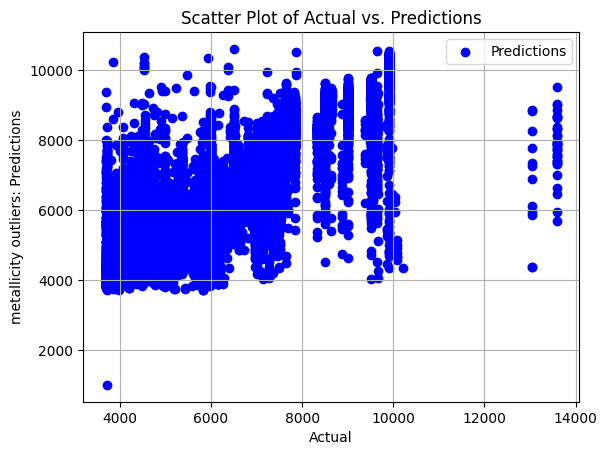

In [18]:
plt.scatter(y_test, predictions, c='b', marker='o', label='Predictions')

# Add labels and a 1:1 line for reference
plt.xlabel('Actual')
plt.ylabel('metallicity outliers: Predictions')
plt.plot(color='red', linestyle='--', label='1:1 Line')

# Add a legend
plt.legend()

# Show the plot
plt.title("Scatter Plot of Actual vs. Predictions")
plt.grid(True)
plt.show()

In [19]:
#for predicted y values of less than 100, find the associated input values
for i in range(len(predictions)):
    if predictions[i] < 100:
        print("Input:", X_test[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i])  # predictions[i] is a 2D array, so we access the value with [0]
        print()
